# Explore Data
This notebook explores the data for the HappyWhale competition. Ultimately, a TensorFlow dataset will be created using this data. This notebook is to explore the structure of the data so that a TensorFlow dataset can be created from it.

There are around 15k individual animals in this dataset of ~50k images, yeilding on average 3 pictures for each individual animal. 

The initial approach we will take for this project will be to use a siamese network to do animal verification. We will compare the representation of a candidate animnal to all 15k animals in the database and return the 5 it is closest to.

This approach may be slow because at inference time we loop over all 15k (or possibly 50k) candidate animals (or candidate images).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import os

## Opening an Image in Python

In [3]:
image = Image.open("/home/brandon/kaggle/data/train_images/92d136312caf04.jpg")

In [4]:
array_pic = np.asarray(image)

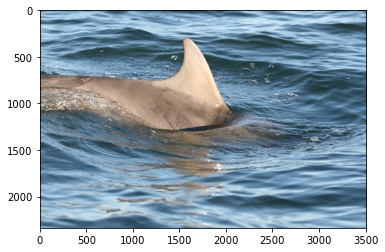

In [5]:
plt.imshow(array_pic)

In [60]:
array_pic.shape

(2336, 3504, 3)

## Labels

In [6]:
import pandas as pd
fpath = "/home/brandon/kaggle/data/train.csv"

In [7]:
train_data = pd.read_csv(fpath, index_col=0)

In [73]:
train_data

,species,individual_id
image,,
00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
000562241d384d.jpg,humpback_whale,1a71fbb72250
0007c33415ce37.jpg,false_killer_whale,60008f293a2b
0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
00087baf5cef7a.jpg,humpback_whale,8e5253662392
...,...,...
fff639a7a78b3f.jpg,beluga,5ac053677ed1
fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
fff94675cc1aef.jpg,blue_whale,5401612696b9


In [77]:
image_name = "00087baf5cef7a.jpg"
label = train_data.loc[image_name, 'individual_id']

'8e5253662392'

In [52]:
train_data.iloc[:,1]

image
00021adfb725ed.jpg    cadddb1636b9
000562241d384d.jpg    1a71fbb72250
0007c33415ce37.jpg    60008f293a2b
0007d9bca26a99.jpg    4b00fe572063
00087baf5cef7a.jpg    8e5253662392
                          ...     
fff639a7a78b3f.jpg    5ac053677ed1
fff8b32daff17e.jpg    1184686361b3
fff94675cc1aef.jpg    5401612696b9
fffbc5dd642d8c.jpg    4000b3d7c24e
fffdcd42312777.jpg    4ddb2eeb5efb
Name: individual_id, Length: 51033, dtype: object

In [65]:
train_data['tmp'] = 'nothing'

In [66]:
train_data.head()  # grabs the first 5 rows

,species,individual_id,tmp
image,,,
00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,nothing
000562241d384d.jpg,humpback_whale,1a71fbb72250,nothing
0007c33415ce37.jpg,false_killer_whale,60008f293a2b,nothing
0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,nothing
00087baf5cef7a.jpg,humpback_whale,8e5253662392,nothing


In [9]:
tmp = train_data.individual_id

In [71]:
tmp.shape

(51033,)

In [70]:
tmp

NameError: name 'tmp' is not defined

In [75]:
tmp[0]

'cadddb1636b9'

In [77]:
tmp[1]

'1a71fbb72250'

In [78]:
np.array(tmp)

array(['cadddb1636b9', '1a71fbb72250', '60008f293a2b', ...,
       '5401612696b9', '4000b3d7c24e', '4ddb2eeb5efb'], dtype=object)

In [11]:
np.unique(np.array(tmp)).shape

(15587,)

In [85]:
len(tmp) / np.unique(np.array(tmp)).shape[0]  # about three images per individual

3.274074549303907

In [81]:
len(tmp)

51033

## Buidling a TensorFlow input pipeline

In [2]:
import tensorflow as tf

2022-04-06 23:50:01.656309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
image_dataset = tf.data.Dataset.list_files("/home/brandon/kaggle/data2/*/*")

2022-04-06 23:50:09.347106: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-06 23:50:09.348142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-06 23:50:09.431846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 23:50:09.432916: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA RTX A4000 computeCapability: 8.6
coreClock: 1.56GHz coreCount: 48 deviceMemorySize: 15.74GiB deviceMemoryBandwidth: 417.29GiB/s
2022-04-06 23:50:09.433012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2

In [139]:
image_dataset.batch(32)

<BatchDataset shapes: (None,), types: tf.string>

In [140]:
for f in image_dataset.take(5):
    print(f.numpy())

b'/home/brandon/kaggle/data/train_images/eabb896c393840.jpg'
b'/home/brandon/kaggle/data/train_images/8d5cc990aeb5d3.jpg'
b'/home/brandon/kaggle/data/train_images/b1777ec9109a84.jpg'
b'/home/brandon/kaggle/data/train_images/86322e6fc80230.jpg'
b'/home/brandon/kaggle/data/train_images/377bec56602cf6.jpg'


In [141]:
def process_path(file_path):
    return tf.io.read_file(file_path)

img_dataset = image_dataset.map(process_path)

In [142]:
for image_raw in img_dataset.take(2):
    print(repr(image_raw.numpy()[:100]))

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05'
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05'


In [143]:
tf.config.run_functions_eagerly(True)

### Now image must be decoded

In [8]:
# load in the training labels

# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]
    #label2 = train_labels.loc[label.decode('utf-8'), 'individual_id']

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [1080, 1920])
    return image, label

# helper function for displaying image
def show(image, label):
    plt.figure()
    plt.imshow(image)
    label = label.numpy().decode('utf-8')
    #label = train_labels.loc[label, 'individual_id']
    plt.title(label)
    plt.axis('off')

In [9]:
img_data = image_dataset.map(parse_image)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-07 00:01:20.384888: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-07 00:01:20.402672: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2593735000 Hz


label: tf.Tensor(b'10961', shape=(), dtype=string)
label: tf.Tensor(b'379', shape=(), dtype=string)
label: tf.Tensor(b'12188', shape=(), dtype=string)
label: tf.Tensor(b'11688', shape=(), dtype=string)
label: tf.Tensor(b'12567', shape=(), dtype=string)
label: tf.Tensor(b'2534', shape=(), dtype=string)
label: tf.Tensor(b'1936', shape=(), dtype=string)
label: tf.Tensor(b'403', shape=(), dtype=string)
label: tf.Tensor(b'14191', shape=(), dtype=string)
label: tf.Tensor(b'5102', shape=(), dtype=string)


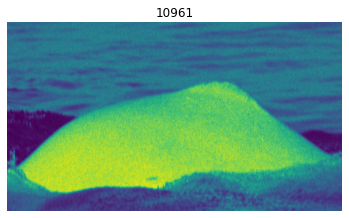

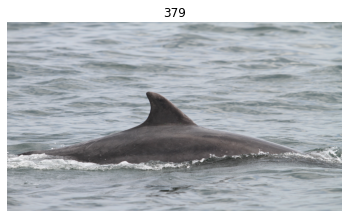

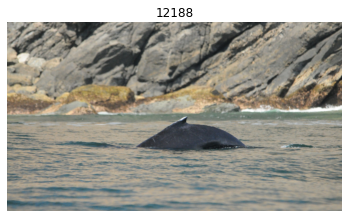

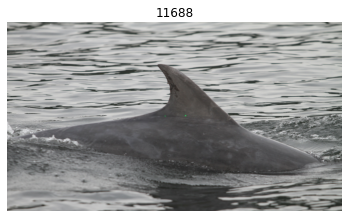

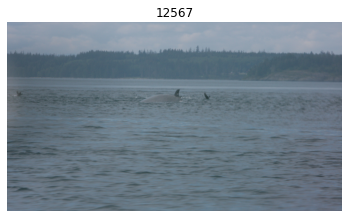

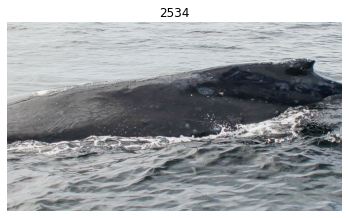

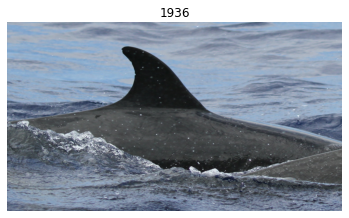

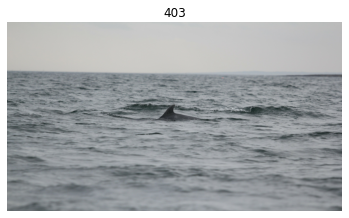

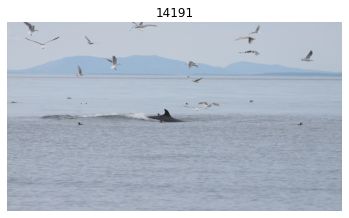

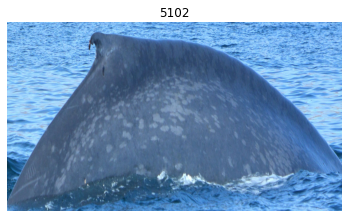

In [10]:
for image, label in img_data.take(10):
    show(image, label)
    print("label:", label)

### Map Subject Id

In [150]:
np.array(train_labels['individual_id']).shape

(51033,)

In [151]:
np.unique(np.array(train_labels['individual_id'])).shape

(15587,)

In [152]:
unique_ids = np.unique(np.array(train_labels['individual_id']))

In [153]:
unique_ids

array(['0013f1f5f2f0', '001618e0a31e', '0018a0f40586', ...,
       'fffb11ff4575', 'fffe15363b92', 'ffff6255f559'], dtype=object)

In [185]:
sample_id = unique_ids[5601]

In [186]:
sample_id

'5c3c39c0fc83'

In [192]:
result = train_labels.loc[train_labels.individual_id==sample_id]

In [197]:
image_files = result.index

In [199]:
for f in image_files:
    print(f)

2b26c66e2f3840.jpg
7db68ca5f14ac0.jpg


In [200]:
unique_ids

array(['0013f1f5f2f0', '001618e0a31e', '0018a0f40586', ...,
       'fffb11ff4575', 'fffe15363b92', 'ffff6255f559'], dtype=object)

In [201]:
unique_ds = pd.DataFrame(unique_ids)

In [202]:
unique_ds.head()

,0
0,0013f1f5f2f0
1,001618e0a31e
2,0018a0f40586
3,00191b9a2f6f
4,001a09e48b2d


In [203]:
unique_ds.to_csv("tmp.csv")

In [205]:
pwd

'/home/brandon/kaggle'